In [18]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
train_csv = '/content/drive/My Drive/train_data.csv'
test_csv = '/content/drive/My Drive/test_data.csv'
train_data = pd.read_csv(train_csv, sep = ",", header= 0)
test_data = pd.read_csv(test_csv, sep = ",", header= 0)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71656 entries, 0 to 71655
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   company_id   71656 non-null  int64 
 1   information  71656 non-null  object
 2   type         71656 non-null  object
 3   text         71656 non-null  object
 4   lower        71656 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   company_id   1000 non-null   int64 
 1   information  1000 non-null   object
 2   type         1000 non-null   object
 3   text         1000 non-null   object
 4   lower        1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


## data cleaning

In [23]:
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## cleaning the stopwords, punctuations and stemming the words

In [24]:
def cleaning_text(text):
    # Remove punctuation
    no_punctuation = ''.join([char for char in text if char not in string.punctuation])

    # Lowercase the text
    no_punctuation_lower = no_punctuation.lower()

    # Tokenize the text into words
    words = nltk.word_tokenize(no_punctuation_lower)

    # Remove stopwords and non-alphabetic characters, and lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stopwords.words('english') and word.isalpha()]

    # This ensures that the lemmatization process is applied only to valid alphabetic words, discarding numbers and symbols.

    # Join the lemmatized words back into a sentence
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text


## check the length of the text

In [25]:
train_data["preprocessed_text"] = train_data["lower"].apply(cleaning_text)
test_data["preprocessed_text"] = test_data["lower"].apply(cleaning_text)

In [26]:
train_path = '/content/drive/My Drive/train_clean.csv'
test_path = '/content/drive/My Drive/test_clean.csv'
train_data.to_csv(train_path, index=False)
test_data.to_csv(test_path, index=False)

## doing some visualization here based on the clean data


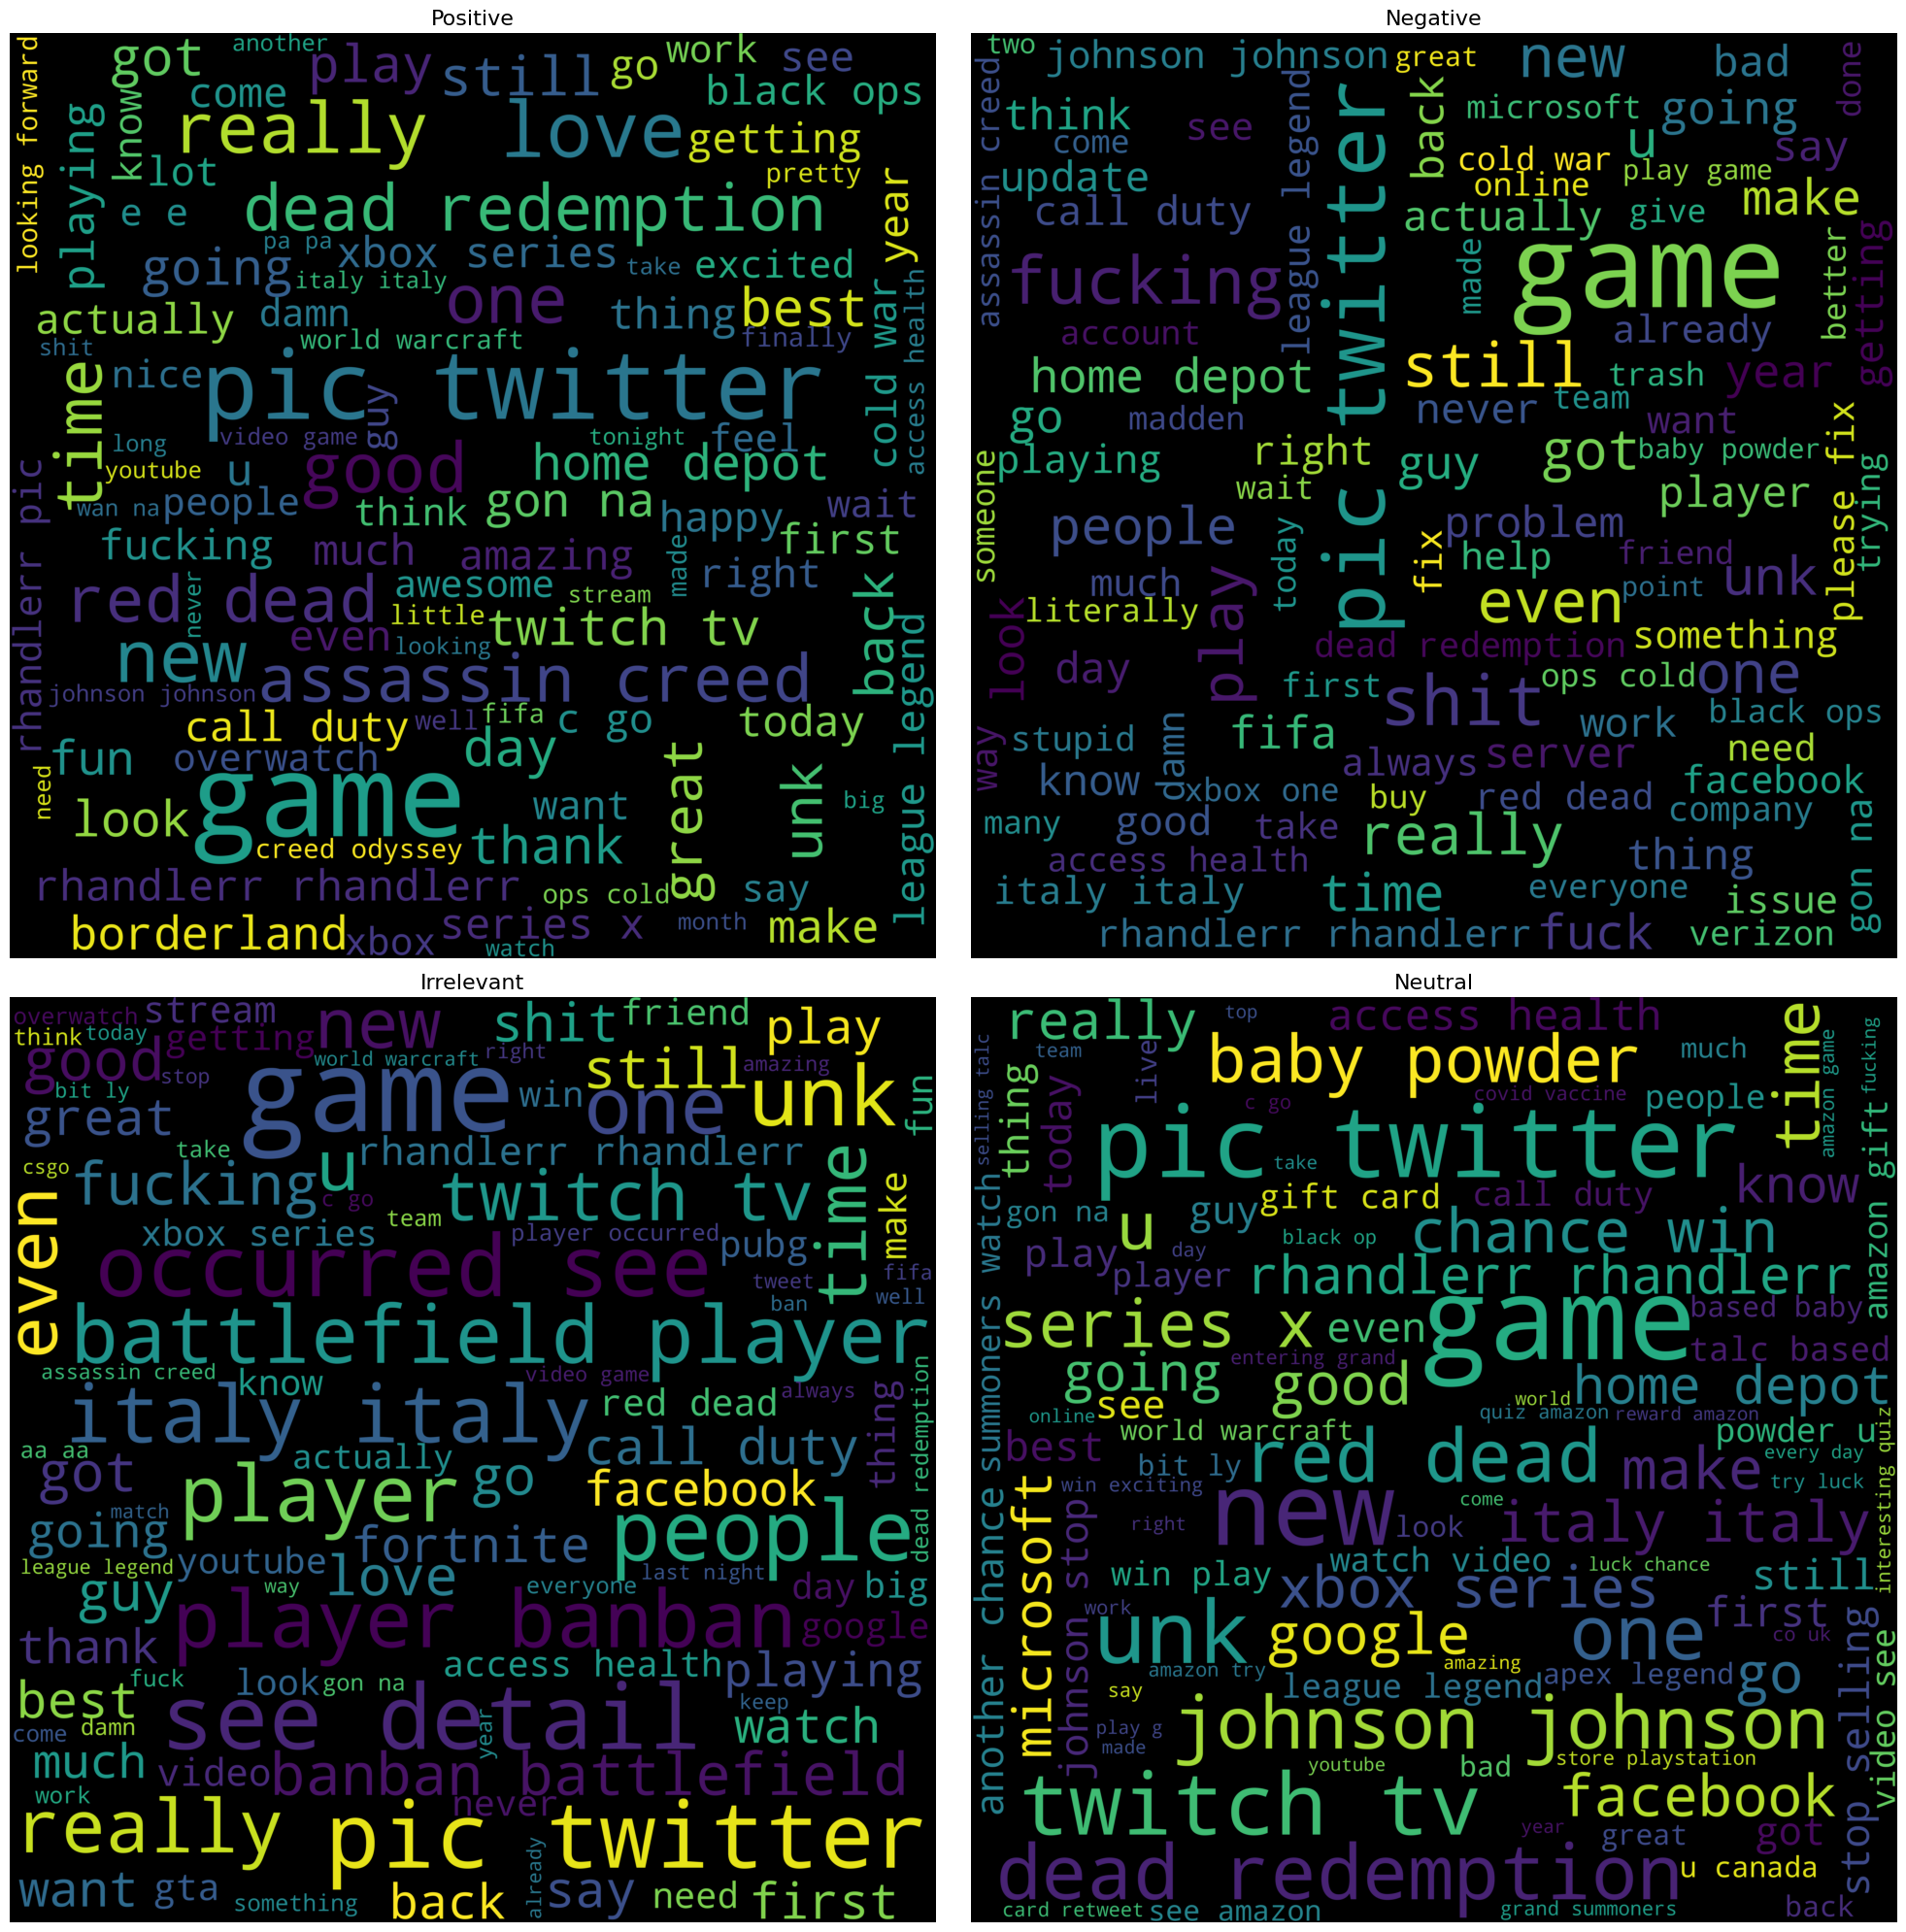

In [30]:
def generate_word_cloud(text, title, ax):
    wordcloud = WordCloud(
        max_font_size=100,
        max_words=100,
        background_color="black",
        scale=10,
        width=800,
        height=800
    ).generate(text)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(title, fontsize=16)
    ax.axis("off")

# Create figure and axes for the subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Generate and plot word clouds for each type
types = ['Positive', 'Negative', 'Irrelevant', 'Neutral']

for i, sentiment_type in enumerate(types):
    word_cloud_text = ''.join(train_data[train_data["type"] == sentiment_type].preprocessed_text)
    ax = axes[i//2, i%2]  # Position in subplot grid
    generate_word_cloud(word_cloud_text, sentiment_type, ax)

# Display the plots
plt.tight_layout()
plt.show()


In [27]:
train_data

,company_id,information,type,text,lower,preprocessed_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,im getting borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,coming border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...,im getting borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,im coming borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,im getting borderland murder
...,...,...,...,...,...,...
71651,9200,Nvidia,Positive,Just realized that the Windows partition of my...,just realized that the windows partition of my...,realized window partition mac like year behind...
71652,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...,realized mac window partition year behind nvid...
71653,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...,realized window partition mac year behind nvid...
71654,9200,Nvidia,Positive,Just realized between the windows partition of...,just realized between the windows partition of...,realized window partition mac like year behind...


## embeddings
- Count-based embeddings (like Bag of Words or CountVectorizer) are simple and effective for basic tasks but lack context.
- TF-IDF improves by considering word importance.
- Word2Vec, GloVe, and FastText capture semantic relationships between words and are dense representations.
- BERT, RoBERTa, and other transformer-based models produce contextual embeddings, which are more powerful for tasks requiring an understanding of meaning in context.
- LDA and LSA can extract topic-based embeddings.
